# Task 1

In [7]:
import sys
sys.path.insert(0, '/Users/laerte/pam_ai/pam_ai/src')
import random
import matplotlib.pyplot as plt
import numpy as np


from Task_1.agent import GameAgent
from Task_1.grid import GameGrid
from Task_1.simple_search import SimpleSearch

### Initialise the objects

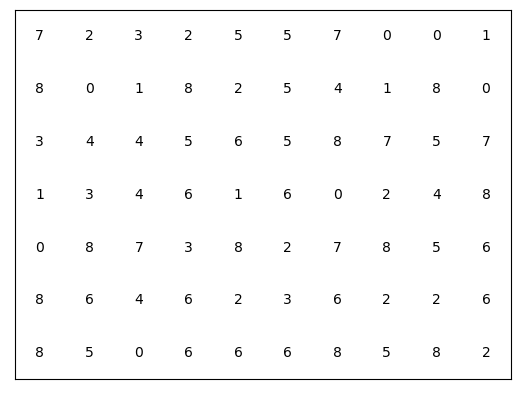

In [8]:
# The object GameAgent is employed to store agent position and the overall value of game movements
# It is initated given the initial position of the agent, i.e., (0,0) to make it start at left-upper corner
ag = GameAgent(0,0)

# The grid initiated and printed using the GameGrid class. 
# It requires as argumentes the vertical and horizontal dimensions of the grid
gd = GameGrid(7,10) 
gd.generate_grid()
gd.print_grid()


### Simple Search

In [9]:
simple_search = SimpleSearch(ag,gd)
simple_search.compute_path()

In [10]:
print(simple_search.visited_set)

{0, (0, 1), (2, 1), (3, 4), (3, 7), (1, 1), (6, 8), (5, 7), (6, 7), (3, 3), (3, 6), (2, 2), (3, 2), (6, 9), (4, 7), (3, 5)}


### Dijkstra Search


In [17]:
M = np.array([[1,7,3,8],[4,0,5,6],[1,7,8,9]])
print(M)

[[1 7 3 8]
 [4 0 5 6]
 [1 7 8 9]]


In [5]:
i = 0
j = 0

